In [1]:
import json

In [3]:
# twitterscraper "#msft OR #microsoft  OR #windows OR #azure OR #xbox lang:en filter:verified" -bd 2019-01-01 -p 50 -o tweets_msft.json -ow
with open('tweets_goog18-19.json', 'r') as f:
    tweets = json.load(f, encoding = 'utf-8')

In [4]:
print(len(tweets))
print(len(tweets[0]))
print(tweets[0].keys())

69680
10
dict_keys(['fullname', 'html', 'id', 'likes', 'replies', 'retweets', 'text', 'timestamp', 'url', 'user'])


In [5]:
[tweet.pop('fullname') for tweet in tweets]
[tweet.pop('html') for tweet in tweets]
[tweet.pop('id') for tweet in tweets]
[tweet.pop('likes') for tweet in tweets]
[tweet.pop('replies') for tweet in tweets]
[tweet.pop('retweets') for tweet in tweets]
[tweet.pop('url') for tweet in tweets]
[tweet.pop('user') for tweet in tweets]

['tvaddonsco',
 'hughriminton',
 'ThePerezHilton',
 'rolandsmartin',
 'rolandsmartin',
 'rolandsmartin',
 'rolandsmartin',
 'DeviantArt',
 'rolandsmartin',
 'BryanDechart',
 'rolandsmartin',
 'rolandsmartin',
 'rolandsmartin',
 'DeccanHerald',
 'adachis',
 'ChrisCaggs',
 'samsung_dev',
 'AndruEdwards',
 'MakeUseOf',
 'busysignal_turf',
 'tvaddonsco',
 'hughriminton',
 'ThePerezHilton',
 'rolandsmartin',
 'rolandsmartin',
 'rolandsmartin',
 'rolandsmartin',
 'DeviantArt',
 'rolandsmartin',
 'BryanDechart',
 'rolandsmartin',
 'rolandsmartin',
 'rolandsmartin',
 'DeccanHerald',
 'adachis',
 'ChrisCaggs',
 'samsung_dev',
 'AndruEdwards',
 'MakeUseOf',
 'busysignal_turf',
 'vidIQ',
 'vidIQ',
 'derekmross',
 'vidIQ',
 'marccortes',
 'vidIQ',
 'vidIQ',
 'CiscoCloud',
 'vidIQ',
 'adafruit',
 'vidIQ',
 'rolandsmartin',
 'ProgressSW',
 'vidIQ',
 'vidIQ',
 'vidIQ',
 'BigOShow',
 'vidIQ',
 'ofadam',
 'RT_com',
 'BrendaBlanco',
 'whosmolly',
 'the_hindu',
 'vidIQ',
 'vidIQ',
 'vidIQ',
 'FFGames',
 

In [6]:
print(tweets[0])

{'text': "Don't buy your next #Android TV box off some fly-by-night flea market seller!  https://www.tvaddons.co/androidtv-kodi-boxes/\xa0…", 'timestamp': '2019-07-12T23:48:22'}


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [8]:
#tweet = tweets[0]
#print(tweet)
#temp = analyzer.polarity_scores(tweet.pop('text'))
#temp_tweet['vader'] = temp.pop('compound')
for tweet in tweets:
    tweet['vader'] = (analyzer.polarity_scores(tweet.get('text'))).pop('compound')

In [9]:
print(tweets[0])

{'text': "Don't buy your next #Android TV box off some fly-by-night flea market seller!  https://www.tvaddons.co/androidtv-kodi-boxes/\xa0…", 'timestamp': '2019-07-12T23:48:22', 'vader': 0.0}


In [10]:
import numpy as np
import datetime

%matplotlib inline
import matplotlib as plt

vaderScores = np.empty([len(tweets)])
timeStamps = np.empty([len(tweets)], dtype = datetime.datetime)
for i in range(len(tweets)):
    vaderScores[i] = tweets[i].get('vader')
    timeStamps[i] = datetime.datetime.strptime(tweets[i].get('timestamp'), '%Y-%m-%dT%H:%M:%S')
print('Mean: ' + str(np.mean(vaderScores)))
print('Standard deviation: ' + str(np.std(vaderScores)))

Mean: 0.15066354334098736
Standard deviation: 0.38956269320720527


(69680, 2)
2019-07-12 23:48:22
383


C:\Users\patel\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


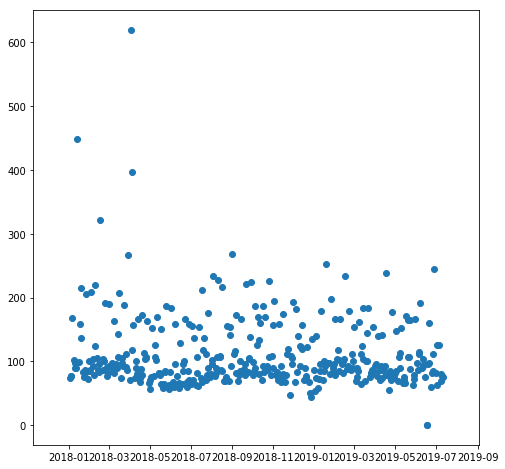

In [11]:
import pandas as pd

denoisedVader = vaderScores[vaderScores != 0]
vader_times = np.transpose(np.vstack((timeStamps, vaderScores)))
vader_times_Size = vader_times.shape
print(vader_times_Size)
df = pd.DataFrame(vader_times, columns=['date', 'vader'])
df.sort_values(by=['date'], ascending = True, inplace = True)

print(df.values[len(timeStamps)-1, 0])
minTime = df.values[0, 0]
maxTime = df.values[len(timeStamps)-1, 0]

daysIncluded = np.busday_count(minTime.strftime('%Y-%m-%d'), maxTime.strftime('%Y-%m-%d'), holidays = 
                     ['2018-01-01', '2018-01-15', '2018-02-19', '2018-03-30', '2018-05-28', '2018-07-04',
                      '2018-09-03', '2018-11-22', '2018-12-05', '2018-12-25',
                      '2019-01-01', '2019-01-21', '2019-02-18', '2019-04-19', '2019-05-27', '2019-07-04'])
calendar = np.busdaycalendar(holidays = 
                     ['2018-01-01', '2018-01-15', '2018-02-19', '2018-03-30', '2018-05-28', '2018-07-04',
                      '2018-09-03', '2018-11-22', '2018-12-05', '2018-12-25',
                      '2019-01-01', '2019-01-21', '2019-02-18', '2019-04-19', '2019-05-27', '2019-07-04'])
print(daysIncluded)

NUM_SAMPLES = len(timeStamps)

mean_impute = np.mean(denoisedVader)
std_impute = np.std(denoisedVader)

dates = np.arange(np.datetime64(minTime.strftime('%Y-%m-%d')), np.datetime64(maxTime.strftime('%Y-%m-%d')))
dates = dates[np.is_busday(dates, busdaycal = calendar)]

std_arr = np.empty(daysIncluded)
mean_arr = np.empty(daysIncluded)
vol_arr = np.empty(daysIncluded)
std_exists = np.empty(daysIncluded)
mean_exists = np.empty(daysIncluded)

imported_dates = np.empty(NUM_SAMPLES, dtype = 'datetime64[D]')
for d in range(NUM_SAMPLES):
    tempDate = np.datetime64(df.values[d, 0].strftime('%Y-%m-%d'))
    imported_dates[d] = tempDate

for i in range(daysIncluded):
    if i == daysIncluded-1:
        idx = (imported_dates == dates[i])
        tempVader = df.values[idx, 1]
    else:
        idx = np.where((imported_dates >= dates[i]) & (imported_dates < dates[i+1]))
        tempVader = df.values[idx, 1]
    if tempVader.size == 0:
        std_arr[i] = std_impute
        mean_arr[i] = mean_impute
        vol_arr[i] = 0
        std_exists[i] = 0
        mean_exists[i] = 0
    else:
        tempVader = tempVader[tempVader != 0]
        if tempVader.size == 0:
            std_arr[i] = std_impute
            mean_arr[i] = mean_impute
            vol_arr[i] = 0
            std_exists[i] = 0
            mean_exists[i] = 0
        else:
            std_arr[i] = np.std(tempVader)
            mean_arr[i] = np.mean(tempVader)
            vol_arr[i] = tempVader.size
            std_exists[i] = 1
            mean_exists[i] = 1
    
plt.pyplot.figure(figsize=(8, 8))
plt.pyplot.scatter(dates, vol_arr)

In [12]:
output_df = pd.DataFrame({'dates':dates, 'vader_mean':mean_arr, 'vader_std':std_arr, 
                         'volume':vol_arr, 'mean_exist':mean_exists, 'std_exist':std_exists})
print(output_df)

         dates  vader_mean  vader_std  volume  mean_exist  std_exist
0   2018-01-02    0.058547   0.556658    74.0         1.0        1.0
1   2018-01-03    0.241836   0.524878    77.0         1.0        1.0
2   2018-01-04    0.221679   0.462885    77.0         1.0        1.0
3   2018-01-05    0.247730   0.444727   168.0         1.0        1.0
4   2018-01-08    0.294749   0.423766   102.0         1.0        1.0
5   2018-01-09    0.180163   0.465366    98.0         1.0        1.0
6   2018-01-10    0.255430   0.409168    89.0         1.0        1.0
7   2018-01-11    0.111501   0.485319    90.0         1.0        1.0
8   2018-01-12    0.536160   0.433730   449.0         1.0        1.0
9   2018-01-16    0.320765   0.410240    99.0         1.0        1.0
10  2018-01-17    0.222819   0.444351   159.0         1.0        1.0
11  2018-01-18    0.253037   0.465701   137.0         1.0        1.0
12  2018-01-19    0.221073   0.457119   215.0         1.0        1.0
13  2018-01-22    0.275089   0.441

In [13]:
output_df.to_json('tweets_goog18-19_mod.json', orient='split')